In [59]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing

# load and split
train_data= pd.read_csv('../irdm/MSLR-WEB10K/Fold1/train.txt', nrows=10000, header=None)
vali_data = pd.read_csv('../irdm/MSLR-WEB10K/Fold1/vali.txt', nrows=10000, header=None)
test_data = pd.read_csv('../irdm/MSLR-WEB10K/Fold1/test.txt', nrows=10000, header=None)
train_df = pd.DataFrame(train_data[0].str.split(' ',2).tolist(),columns = ['relevancy','qid','features'])
vali_df = pd.DataFrame(vali_data[0].str.split(' ',2).tolist(),columns = ['relevancy','qid','features'])
test_df = pd.DataFrame(test_data[0].str.split(' ',2).tolist(),columns = ['relevancy','qid','features'])

In [60]:
# splits 136 features
features = list(range(1, 137))
train_feature_df = pd.DataFrame(train_df['features'].str.split(' ',135).tolist(), columns = features)
vali_feature_df = pd.DataFrame(vali_df['features'].str.split(' ',135).tolist(), columns = features)
test_feature_df = pd.DataFrame(test_df['features'].str.split(' ',135).tolist(), columns = features)

In [61]:
# drop old feature column
train_df = train_df.drop(['features'], axis=1)
vali_df = vali_df.drop(['features'], axis=1)
test_df = test_df.drop(['features'], axis=1)

# add new divided feature column to main df
train_df = pd.concat([train_df,train_feature_df], axis=1)
vali_df = pd.concat([vali_df,vali_feature_df], axis=1)
test_df = pd.concat([test_df,test_feature_df], axis=1)

In [62]:
# rel type int
train_df.relevancy = train_df.relevancy.astype(np.int64)
vali_df.relevancy = vali_df.relevancy.astype(np.int64)
test_df.relevancy = test_df.relevancy.astype(np.int64)

In [63]:
train_feat = train_df.columns[2:138]
vali_feat = vali_df.columns[2:138]
test_feat = test_df.columns[2:138]

In [64]:
train_df_all_feat = train_df[train_feat]
vali_df_all_feat = vali_df[vali_feat]
test_df_all_feat = test_df[test_feat]

# convert values to integers (removes : )
# + prepares input for lr
le = preprocessing.LabelEncoder()

train_df_all_feat = train_df_all_feat.apply(le.fit_transform)
vali_df_all_feat = vali_df_all_feat.apply(le.fit_transform)
test_df_all_feat = test_df_all_feat.apply(le.fit_transform)

#train_df_small_feat = train_df_all_feat[1,3].values

train_df_small_feat = train_df_all_feat.drop([2,4,5,6,7,8,9,10,11,12,13,14,15,17,19,20,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99], axis=1)
vali_df_small_feat = vali_df_all_feat.drop([2,4,5,6,7,8,9,10,11,12,13,14,15,17,19,20,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99], axis=1)
test_df_small_feat = test_df_all_feat.drop([2,4,5,6,7,8,9,10,11,12,13,14,15,17,19,20,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99], axis=1)

In [65]:
train_df_small_feat.head(5)

,1,3,16,18,21,23,46,48,71,72,...,127,128,129,130,131,132,133,134,135,136
0,3,0,60,40,122,0,1689,0,4360,167,...,102,57,13,339,5921,34,163,0,0,0
1,3,3,60,40,118,15,4406,146,4497,0,...,93,57,13,492,5921,0,110,0,0,0
2,3,2,60,40,44,10,5038,151,2660,0,...,84,672,1,492,2586,44,204,0,0,0
3,3,3,60,40,174,15,2104,156,1078,0,...,95,57,6,476,5913,0,163,0,0,0
4,3,3,60,40,185,15,423,156,1424,0,...,104,947,67,2390,4376,0,34,0,0,0


/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


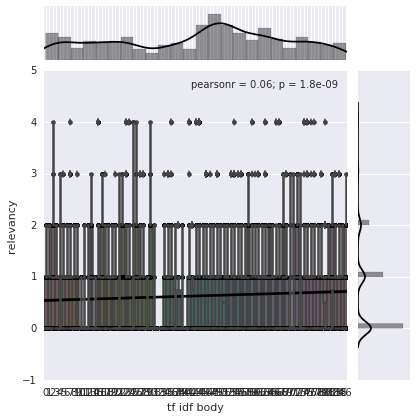

In [66]:
import seaborn as sns
mean, cov = [0, 1], [(1, .5), (.5, 1)]

x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("darkgrid"):
    f = sns.jointplot(x=train_df_small_feat[16], y=train_df['relevancy'], kind="reg", color="k");

ax = sns.boxplot(x=train_df_small_feat[16], y=train_df['relevancy'], linewidth=2.5)
f.set_axis_labels('tf idf body', 'relevancy')

In [67]:
train_df_targets = np.array(train_df.relevancy).T
vali_df_targets = np.array(vali_df.relevancy).T

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_df_small_feat, train_df_targets)


pd.set_option('display.float_format', lambda x: '%.3f' % x)

pred_rel = []
highest_prob = []
rel_prob = []
all_prob = []

for i in range(0, len(vali_df)):
    five_prob=[]
    query = vali_df_small_feat._slice(slice(i,i+1))    
    rel = query.iloc[0]

    query_df_all_feat = query[query.columns.values]

    predicted_rel = lr.predict(query_df_all_feat)
    pred_rel.append(predicted_rel)
    predicted_rel_prob = lr.predict_proba(query_df_all_feat)
    
    rel_prob.append(predicted_rel_prob[0])
    five_prob.append(predicted_rel_prob[0][0])
    five_prob.append(predicted_rel_prob[0][1])
    five_prob.append(predicted_rel_prob[0][2])
    five_prob.append(predicted_rel_prob[0][3])
    five_prob.append(predicted_rel_prob[0][4])
    all_prob.append(five_prob)
    highest_prob.append(max(five_prob))
df_pred_rel = pd.DataFrame(pred_rel)
df_rel_prob = pd.DataFrame(rel_prob)

pd_highest_prob = pd.DataFrame(highest_prob, columns = ['highest'])
pd_all_prob = pd.DataFrame(all_prob, columns =['0','1','2','3','4'])

,0,1,2,3,4
0,0.810,0.148,0.039,0.003,0.000
1,0.483,0.446,0.063,0.008,0.000
2,0.535,0.319,0.136,0.009,0.000
3,0.523,0.363,0.107,0.007,0.001
4,0.340,0.506,0.134,0.018,0.001


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, log_loss
from sklearn import metrics

print("Accuracy Score LR:", accuracy_score(vali_df_targets, df_pred_rel))
print("Confusion Matrix LR: \n", confusion_matrix(vali_df_targets, df_pred_rel))
print(metrics.classification_report(vali_df_targets, df_pred_rel))

Accuracy Score LR: 0.5932
Confusion Matrix LR: 
 [[4949 1003   35    0    2]
 [1586  926   60    0    0]
 [ 716  508   57    1    0]
 [  54   51    9    0    0]
 [  17   25    1    0    0]]
             precision    recall  f1-score   support

          0       0.68      0.83      0.74      5989
          1       0.37      0.36      0.36      2572
          2       0.35      0.04      0.08      1282
          3       0.00      0.00      0.00       114
          4       0.00      0.00      0.00        43

avg / total       0.54      0.59      0.55     10000



In [70]:
df_pred_rel.head(10)
#df_rel_prob.head(100) # <-- prob vers of above x 5

,0
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,0
9,0


In [71]:
# str qid -> int qid

train_df['qid'] = train_df.qid.str.replace('qid:' , '').astype('int')
vali_df['qid'] = vali_df.qid.str.replace('qid:' , '').astype('int')
test_df['qid'] = test_df.qid.str.replace('qid:' , '').astype('int')



In [72]:
# matrix
np.set_printoptions(suppress=True)

matrix_rel = df_rel_prob.as_matrix()
matrix_rel[1]

array([ 0.48277895,  0.44638902,  0.06269679,  0.00806363,  0.00007161])

In [73]:
vali_predict = vali_df.copy()
vali_predict['relevancy'] = df_pred_rel
vali_predict = pd.concat([vali_predict, pd_highest_prob], axis=1)
vali_predict.head(10)

,relevancy,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,highest
0,0,10,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:1,129:0,130:117,131:55115,132:7,133:2,134:0,135:0,136:0,0.810
1,0,10,1:1,2:0,3:1,4:3,5:3,6:0.333333,7:0,8:0.333333,...,128:0,129:0,130:153,131:3866,132:17,133:104,134:0,135:0,136:0,0.483
2,0,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:9,130:266,131:56137,132:5,133:2,134:0,135:0,136:0,0.535
3,0,10,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:8,129:0,130:541,131:12621,132:11,133:11,134:0,135:0,136:0,0.523
4,1,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:6,129:0,130:14687,131:40205,132:5,133:3,134:0,135:0,136:0,0.506
5,1,10,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:1896,129:1,130:10577,131:34605,132:1,133:1,134:2175,135:273,136:79.6706653092874,0.419
6,1,10,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:0,129:4,130:3736,131:34605,132:1,133:1,134:0,135:0,136:0,0.474
7,0,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:1,130:11715,131:34605,132:31,133:1,134:0,135:3,136:16.2,0.412
8,0,10,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,...,128:7,129:0,130:11919,131:34605,132:84,133:1,134:0,135:0,136:0,0.695
9,0,10,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:11,130:63657,131:39496,132:10,133:1,134:0,135:218,136:55.0699459783914,0.767


In [74]:
# add final decider to df
sorted_df = vali_predict.sort_values(by=['qid','relevancy','highest'], ascending=[True, False, False])
sorted_df.head(10)

,relevancy,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,highest
68,2,10,1:3,2:3,3:3,4:1,5:3,6:1,7:1,8:1,...,128:31,129:2,130:10927,131:40678,132:1,133:4,134:0,135:0,136:0,0.454
53,2,10,1:3,2:3,3:3,4:3,5:3,6:1,7:1,8:1,...,128:232,129:33,130:11882,131:65535,132:1,133:1,134:0,135:0,136:0,0.405
58,1,10,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:1,129:0,130:2443,131:45875,132:4,133:1,134:0,135:0,136:0,0.523
32,1,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:0,130:26840,131:24726,132:33,133:1,134:0,135:0,136:0,0.515
46,1,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:6,129:0,130:41165,131:17836,132:13,133:4,134:0,135:0,136:0,0.515
4,1,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:6,129:0,130:14687,131:40205,132:5,133:3,134:0,135:0,136:0,0.506
73,1,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:1883,129:1,130:48645,131:35168,132:1,133:1,134:2241,135:426,136:30.1554670902879,0.498
19,1,10,1:3,2:3,3:3,4:0,5:3,6:1,7:1,8:1,...,128:10,129:0,130:719,131:11547,132:15,133:5,134:0,135:0,136:0,0.491
74,1,10,1:3,2:1,3:3,4:1,5:3,6:1,7:0.333333,8:1,...,128:1882,129:3,130:46094,131:35168,132:1,133:1,134:0,135:5,136:8.3,0.489
41,1,10,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:2674,129:1,130:52150,131:34192,132:1,133:1,134:0,135:0,136:0,0.479


In [104]:
def dcg(predicted_rel, rank):
    predicted_rel = np.asarray(predicted_rel)[:rank]
    n_relevances = len(predicted_rel)
    if n_relevances == 0:
        return float(0)

    discounts = np.log2(np.arange(n_relevances) + 2)
    return np.sum(predicted_rel / discounts)


def ndcg(predicted_rel, rank):
    high_sc_dcg = dcg(sorted(predicted_rel, reverse=True), rank)
    if high_sc_dcg == 0:
        return float(0)
    print(high_sc_dcg)

    return dcg(predicted_rel, rank) / high_sc_dcg


In [105]:
# lets test our final ranking results

# True Relevance DCG
dcg([0, 0, 1, 0, 1, 2, 1, 1, 0, 0], rank=10)

# Predicted Relevance DCG
dcg([0, 0, 1, 0, 3, 1, 1, 3, 0, 1], rank=10)

3.5855583988200541

In [106]:
# True Relevance nDCG
ndcg([0, 0, 1, 0, 1, 2, 1, 1, 0, 0], rank=10)


# Predicted nDCG
ndcg([0, 0, 1, 0, 3, 1, 1, 3, 0, 1], rank=10)


3.94845911888
6.56652581313


0.54603583399465572

In [78]:
# Mean Avg Precision (MAP)
# Results from df output for first 10

tr = [0, 0, 1, 0, 1, 2, 1, 1, 0, 0]
pred = [0, 0, 1, 0, 3, 1, 1, 3, 0, 1]

def avg_pred(true, pred, rank=10):
    if (len(pred) > rank):
        pred = pred[:rank]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(pred):
        if p in true and p not in pred[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not true:
        return 0.0

    return score / min(len(true), rank)

def mean_avg_pred(true, pred, rank=10):

    return np.mean([avg_pred(true,pred,rank) for a,p in zip(true, pred)])



In [79]:
mean_avg_pred(tr, pred)

0.16666666666666669

0.617362634289
0.573190027059
0.516208865836
0.499949423427
0.499899568143


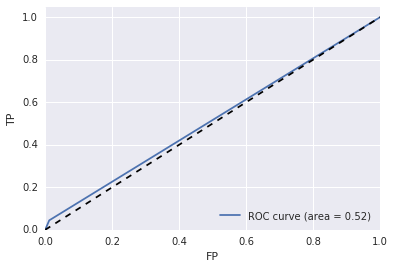

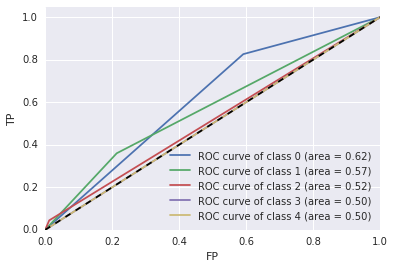

In [102]:
def ROC(label,result):
    %matplotlib inline
    from sklearn.utils import shuffle
    from sklearn.metrics import roc_curve, auc, precision_score, roc_auc_score
    from sklearn.preprocessing import label_binarize
    import pylab as pl
    import numpy as py
    Y = np.array(label)
    truth = label_binarize(label, classes=[0,1,2,3,4])
    n_classes = truth.shape[1]
    pred = label_binarize(result, classes=[0,1,2,3,4])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(truth[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc[i])
        
    # Plot of a ROC curve for a specific class
    pl.figure()
    pl.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.05])
    pl.xlabel('FP')
    pl.ylabel('TP')
    pl.legend(loc="lower right")
    pl.show()

    for i in range(n_classes):
        pl.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.05])
    pl.xlabel('FP')
    pl.ylabel('TP')
    pl.legend(loc="lower right")
    pl.show()


ROC(vali_df['relevancy'], vali_predict['relevancy'])
